<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/DataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the [Original example](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb).

In [1]:
import keras
import os, shutil
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models

keras.__version__

/home/notebook/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.2'

In [6]:
base_dir = '/Users/badriadhikari/Downloads/dogs-vs-cats_small/'
base_dir = '/home/notebook/AnacondaNotebooks/dogs-vs-cats_small/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [8]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [9]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [10]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [11]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [12]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## Questions
#### How many training images?   
#### How many validation images?   
#### How many test images?   
-------

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

-------
## Data preprocessing

Our data sits on a drive as JPEG files, so the steps for getting it into our network are:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [14]:
# Readmore at https://keras.io/preprocessing/image/

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Specify how the ImageDataGenerator will read and deliver
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


--------
### Let's take a look at the output of one of these generators:

In [17]:
print(type(train_generator))

<class 'keras_preprocessing.image.DirectoryIterator'>


In [18]:
fo = train_generator[0]
print(type(fo))

<class 'tuple'>


In [19]:
print(len(fo))

2


In [20]:
a = fo[0]
b = fo[1]

In [21]:
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
print(a.shape)
print(b.shape)

(20, 150, 150, 3)
(20,)


### What does this shape imply?
-------

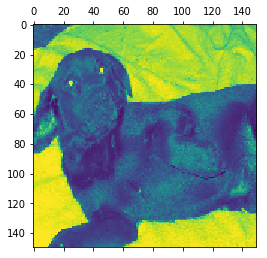

In [23]:
plt.matshow(a[0, :, :, 0])

In [24]:
print(b[0])

1.0


--------
### Do the training

In [25]:
# the number of samples processed for each epoch is batch_size * steps_per_epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 15s 154ms/step - loss: 0.692105 - acc: 0.542000 - val_loss: 0.670575 - val_acc: 0.597000
Epoch 2/10
100/100 [==============================] - 11s 107ms/step - loss: 0.657442 - acc: 0.612500 - val_loss: 0.638486 - val_acc: 0.641000
Epoch 3/10
100/100 [==============================] - 11s 110ms/step - loss: 0.621694 - acc: 0.656000 - val_loss: 0.605067 - val_acc: 0.664000
Epoch 4/10
100/100 [==============================] - 11s 109ms/step - loss: 0.573165 - acc: 0.698500 - val_loss: 0.624384 - val_acc: 0.651000
Epoch 5/10
100/100 [==============================] - 11s 109ms/step - loss: 0.530308 - acc: 0.729500 - val_loss: 0.590640 - val_acc: 0.683000
Epoch 6/10
100/100 [==============================] - 11s 109ms/step - loss: 0.495287 - acc: 0.760000 - val_loss: 0.595789 - val_acc: 0.669000
Epoch 7/10
100/100 [==============================] - 11s 109ms/step - loss: 0.478647 - acc: 0.769500 - val_loss: 0.565772 - val_acc: 0.695000

------
### Save the trained model

In [26]:
model.save('cats_and_dogs_small.h5')

-----
### Plot Learning curves

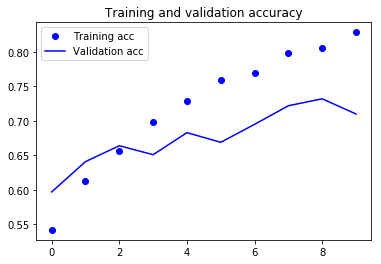

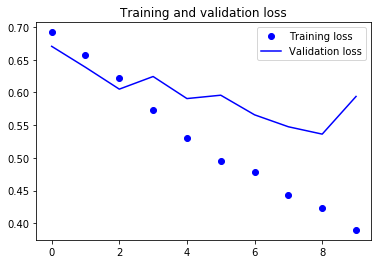

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()